In [7]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd
df = pd.read_csv('/Users/mac/Documents/GitHub/test/complaints.csv')
df.head()

/var/folders/_6/sr9kx_gs6ln5yk6fyc9_g0w00000gn/T/ipykernel_31243/2117861338.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/mac/Documents/GitHub/test/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-18,Checking or savings account,Other banking product or service,Managing an account,Problem accessing account,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,12563,Older American,NaN,Web,2023-08-18,In progress,Yes,NaN,7415940
1,2023-08-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33613,NaN,NaN,Web,2023-08-17,In progress,Yes,NaN,7414860
2,2023-08-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,23452,NaN,NaN,Web,2023-08-17,In progress,Yes,NaN,7414868
3,2023-08-01,Credit card or prepaid card,Store credit card,Fees or interest,Problem with fees,NaN,NaN,"Bread Financial Holdings, Inc.",CT,065XX,NaN,NaN,Web,2023-08-09,In progress,Yes,NaN,7335254
4,2023-08-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WI,XXXXX,Servicemember,NaN,Web,2023-08-17,In progress,Yes,NaN,7415193


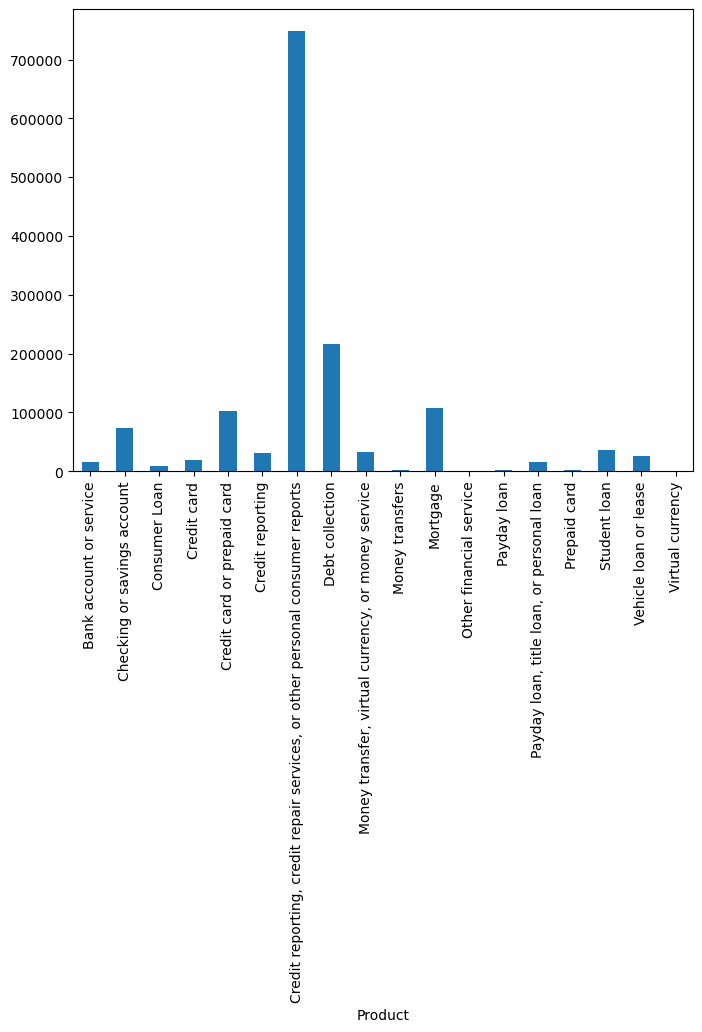

In [9]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

/var/folders/_6/sr9kx_gs6ln5yk6fyc9_g0w00000gn/T/ipykernel_31243/3199623145.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r"/Users/mac/Documents/GitHub/test/complaints.csv")


(3973049, 18)
(3973049, 1)


<Axes: ylabel='count'>

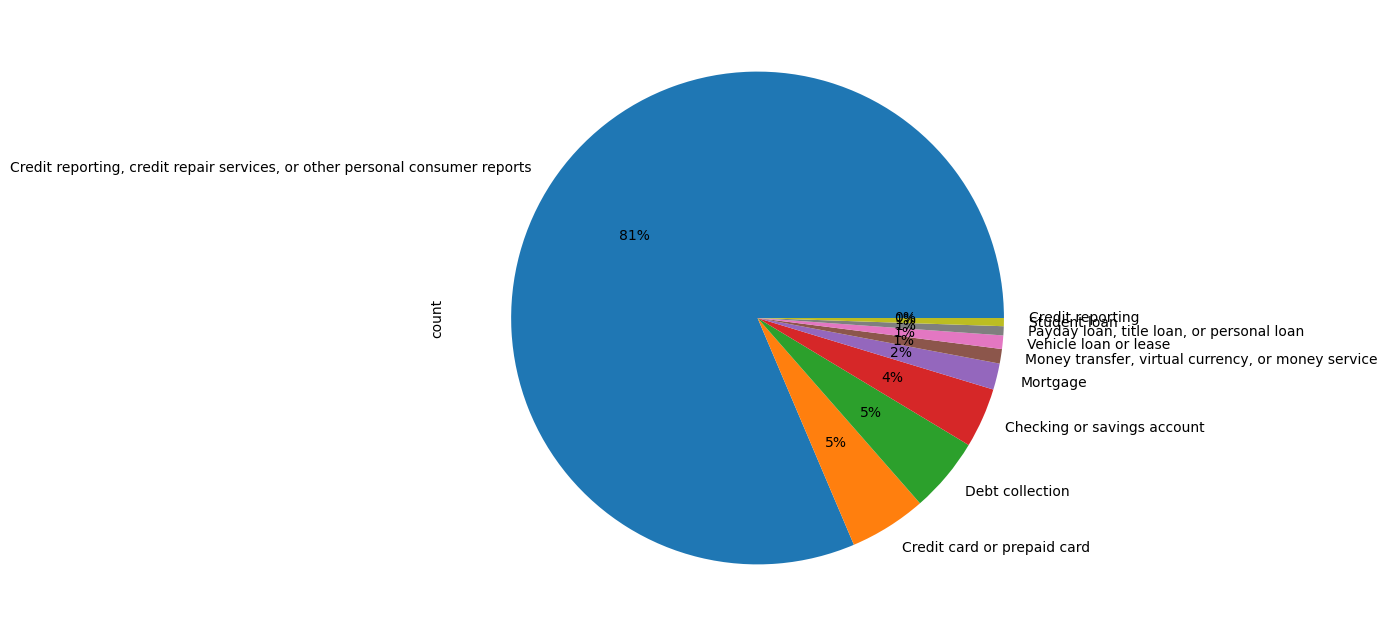

In [10]:
dataset = pd.read_csv(r"/Users/mac/Documents/GitHub/test/complaints.csv")
print(dataset.shape)
dataset.head()
complaints_df = dataset.filter(["Consumer Complaint", "Product"], axis = 1)
complaints_df.head()
complaints_df.isnull().sum()
complaints_df.dropna(inplace=True)
print(complaints_df.shape)
complaints_df.isnull().sum()

complaints_df = complaints_df[:100000]
complaints_df.Product.value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(12, 8))

In [14]:
def clean_text(text):
    complaints = []
    for comp in text:# remove special characters
        comp = re.sub(r'\W', ' ', str(comp))#remove single characters
        comp = re.sub(r'\s+[a-zA-Z]\s+', ' ', comp )# Remove single characters from the beginning
        comp = re.sub(r'\^[a-zA-Z]\s+', ' ', comp)# Converting to Lowercase
        comp = comp.lower()
        complaints.append(comp)
        return complaints
    complaints = clean_text(list(complaints_df['']))
    

from sklearn.feature_extraction.text import TfidfVectorizer
#complaints = clean_text(list(complaints_df['Product']))
tfid_conv = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.7,stop_words=stopwords.words('english'))
X = tfid_conv.fit_transform(complaints).toarray()
complaints_df['Product'] = complaints_df['Product'].astype('category')
y = list(complaints_df['Product'].cat.codes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

ValueError: max_df corresponds to < documents than min_df

In [ ]:
df = pd.read_csv('/Users/mac/Documents/GitHub/test/complaints.csv', nrows=99999) # limiting the rows
df.head()

df = df[pd.notnull(df['Consumer complaint narrative'])]
df.head()
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df.head()

df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

#category_to_id
df.head()